In [1]:
from sparkpdf import *

spark = SparkPdfSession()

24/11/07 17:32:17 WARN Utils: Your hostname, nmelnik-1-0 resolves to a loopback address: 127.0.1.1; using 192.168.0.105 instead (on interface wlo1)
24/11/07 17:32:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/07 17:32:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/11/07 17:32:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/11/07 17:32:18 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
24/11/07 17:32:18 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
24/11/07 17:32:18 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.



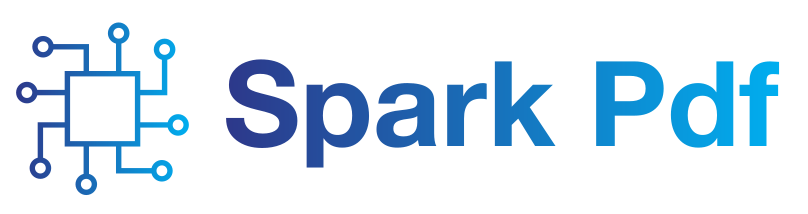

In [5]:
image_example = files.joinpath("resources/images/SparkPdfLogo.png").as_posix()
df = spark.read.format("binaryFile") \
    .load(image_example)

df.show_image("content", width="")

In [3]:
pipeline = PipelineModel(stages=[
    DataToImage(inputCol="content", outputCol="image"),
    TesseractOcr(inputCol="image", outputCol="text", psm=PSM.AUTO, keepInputData=True),
    Ner(model="obi/deid_bert_i2b2", inputCol="text", outputCol="ner", keepInputData=True),
    ImageDrawBoxes(inputCols=["image", "ner"], outputCol="image_with_boxes", lineWidth=3, 
                   padding=5, displayDataList=['entity_group'])
])

result = pipeline.transform(df).cache()

result.show()

+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|                path|    modificationTime|length|                text|                 ner|    image_with_boxes|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|file:/home/nmelni...|2024-10-19 07:19:...|289502|{file:/home/nmeln...|{file:/home/nmeln...|{file:/home/nmeln...|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+


In [4]:
result.show_text("text")

In [5]:
result.show_ner(limit=20)

+------------+-------------------+----------+-----+---+--------------------+
|entity_group|              score|      word|start|end|               boxes|
+------------+-------------------+----------+-----+---+--------------------+
|        HOSP| 0.9897040724754333|  Hospital|    2| 10|[{Hospital:, 0.94...|
|         LOC| 0.9991687536239624|    Dutton|   12| 18|[{Dutton,, 0.9609...|
|         LOC| 0.9992497563362122|        MI|   20| 22|[{MI, 0.93335297,...|
|          ID|  0.713656485080719|        26|   33| 35|[{26-123123, 0.90...|
|       PHONE| 0.4636470675468445|         -|   35| 36|[{26-123123, 0.90...|
|       PHONE| 0.7700974941253662|    123123|   36| 42|[{26-123123, 0.90...|
|       STAFF| 0.3844146728515625|      HOPE|   45| 49|[{HOPE, 0.9525460...|
|        HOSP| 0.9457764029502869|     HAVEN|   50| 55|[{HAVEN, 0.952546...|
|         LOC| 0.9975064992904663|855 Howard|   65| 75|[{855, 0.94682700...|
|         LOC| 0.9984188079833984|    Street|   76| 82|[{Street, 0.95823...|

In [6]:
result.visualize_ner(labels_list=["DATE", "LOC"])


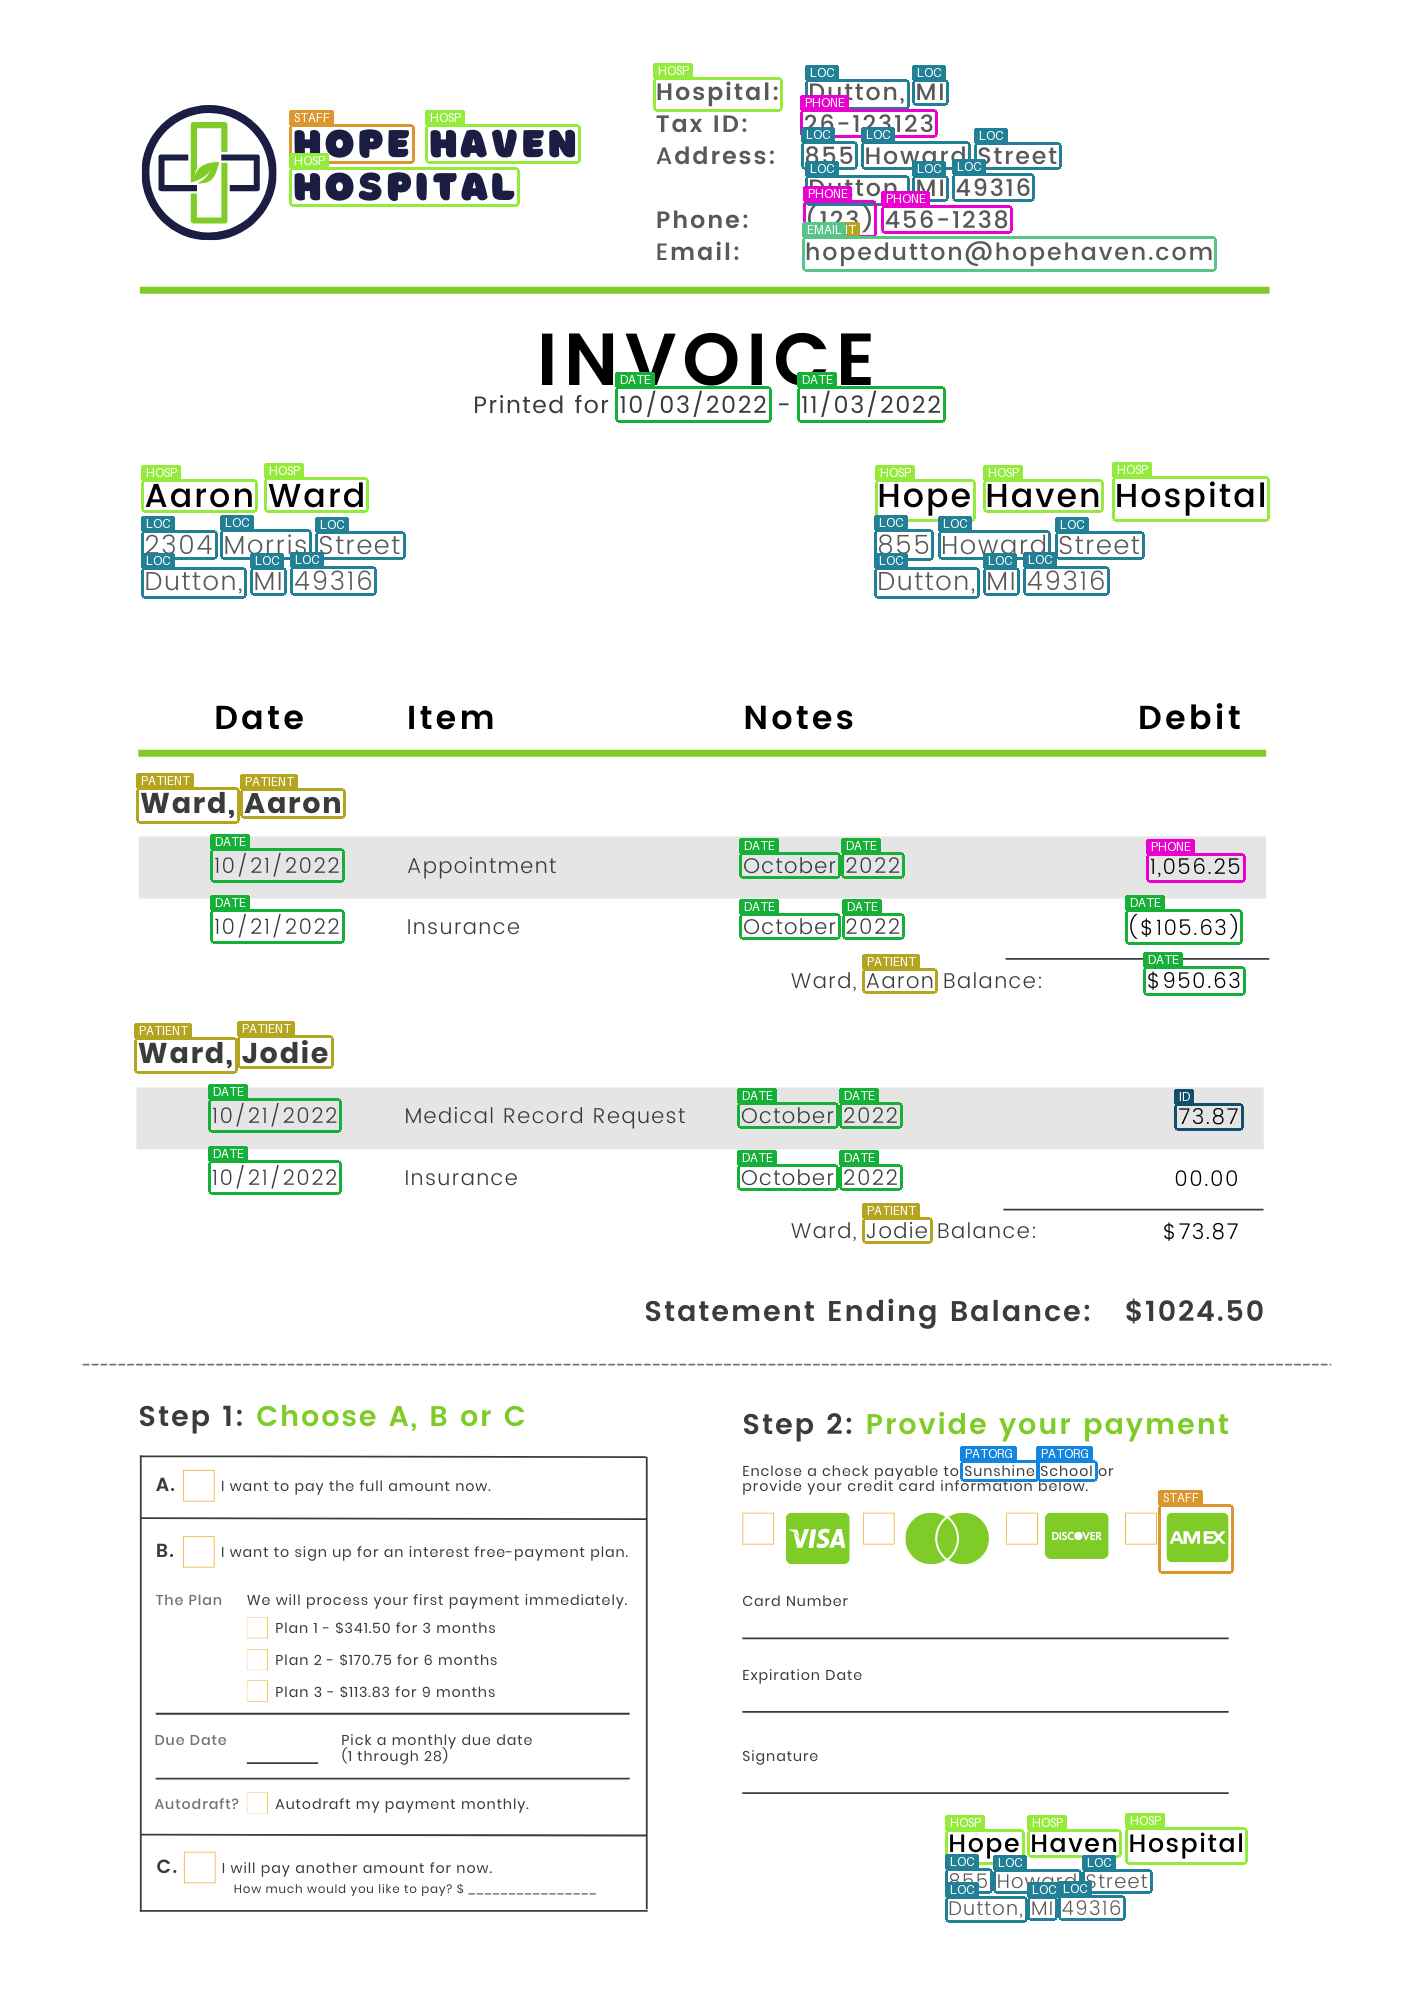

In [7]:
result.show_image("image_with_boxes")